In [2]:
import pandas as pd
data = pd.read_csv('fulldata_pharmacy.csv', encoding='cp949', low_memory=False)

In [5]:
print(data.columns.values)

['번호' '개방서비스명' '개방서비스아이디' '개방자치단체코드' '관리번호' '인허가일자' '인허가취소일자' '영업상태구분코드'
 '영업상태명' '상세영업상태코드' '상세영업상태명' '폐업일자' '휴업시작일자' '휴업종료일자' '재개업일자' '소재지전화'
 '소재지면적' '소재지우편번호' '소재지전체주소' '도로명전체주소' '도로명우편번호' '사업장명' '최종수정시점' '데이터갱신구분'
 '데이터갱신일자' '업태구분명' '좌표정보x(epsg5174)' '좌표정보y(epsg5174)' '약국영업면적' '지정일자'
 'Unnamed: 30']


In [6]:
data_1 = data[['번호', '영업상태명', '영업상태구분코드', '사업장명', '소재지전체주소', '도로명전체주소']]

In [9]:
data_1 = data_1.dropna(subset=['소재지전체주소'])

In [10]:
data_2 = data_1[data_1['소재지전체주소'].str.contains('서울특별시')]
data_2.head(3)

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
0,1,영업/정상,1,김상돈약국,서울특별시 용산구 한남1동 263-15,NaN
249,250,영업/정상,1,지운당한약국,서울특별시 동대문구 제기동 944번지 1호,서울특별시 동대문구 고산자로 469 (제기동)
250,251,영업/정상,1,세림약국,서울특별시 동대문구 제기동 1140번지 1호 2층,"서울특별시 동대문구 약령중앙로 17-1, 2층 (제기동)"


In [12]:
data_3 = data_2[data_2['영업상태명'] != '폐업']
data_3.head(3)

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
0,1,영업/정상,1,김상돈약국,서울특별시 용산구 한남1동 263-15,NaN
249,250,영업/정상,1,지운당한약국,서울특별시 동대문구 제기동 944번지 1호,서울특별시 동대문구 고산자로 469 (제기동)
250,251,영업/정상,1,세림약국,서울특별시 동대문구 제기동 1140번지 1호 2층,"서울특별시 동대문구 약령중앙로 17-1, 2층 (제기동)"


In [15]:
data_3.loc[:, '시군구'] = data_3['소재지전체주소'].str.split().str[1]
data_3.head(3)

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소,시군구
0,1,영업/정상,1,김상돈약국,서울특별시 용산구 한남1동 263-15,NaN,용산구
249,250,영업/정상,1,지운당한약국,서울특별시 동대문구 제기동 944번지 1호,서울특별시 동대문구 고산자로 469 (제기동),동대문구
250,251,영업/정상,1,세림약국,서울특별시 동대문구 제기동 1140번지 1호 2층,"서울특별시 동대문구 약령중앙로 17-1, 2층 (제기동)",동대문구


In [16]:
data_4 = data_3.groupby('시군구').size().reset_index(name='사업장수')
data_4

,시군구,사업장수
0,강남구,553
1,강동구,308
2,강북구,170
3,강서구,260
4,관악구,237
5,광진구,177
6,구로구,168
7,금천구,104
8,노원구,232
9,도봉구,123


In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

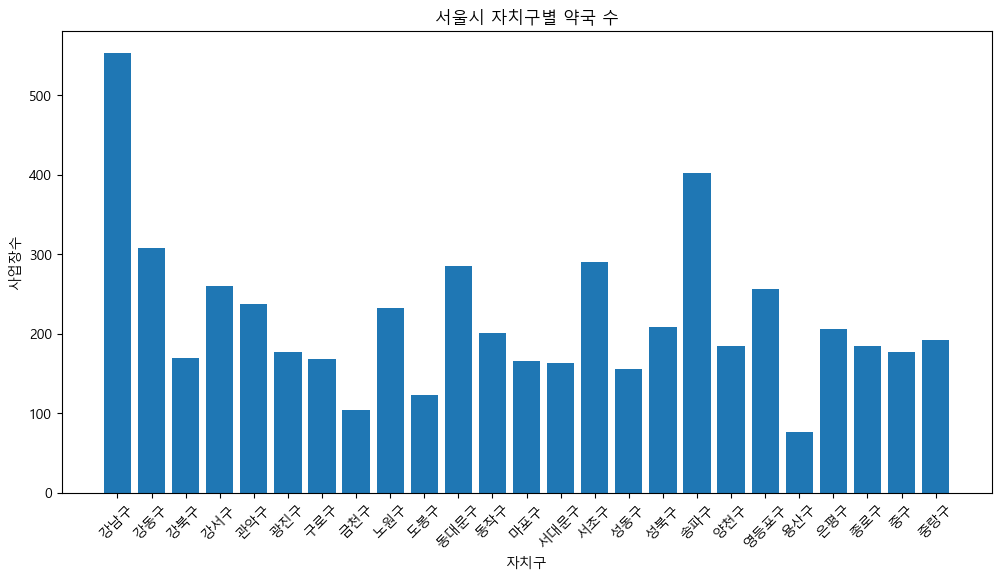

In [20]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(12,6))
plt.bar(data_4['시군구'], data_4['사업장수'])
plt.xticks(rotation=45)
plt.title('서울시 자치구별 약국 수')
plt.xlabel('자치구')
plt.ylabel('사업장수')

plt.show()